In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 99% 607M/612M [00:03<00:00, 131MB/s]
100% 612M/612M [00:03<00:00, 169MB/s]


In [ ]:
from zipfile import ZipFile
dataset='/content/gtsrb-german-traffic-sign.zip'
with ZipFile(dataset,'r')as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [ ]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras import models,layers
from keras.utils import to_categorical
import matplotlib.image as mpimg

In [ ]:
data=[]
labels=[]
classes=43
cur_path=os.getcwd()

In [ ]:
cur_path

'/content'

In [ ]:
for i in range(classes):
  path=os.path.join(cur_path,'Train',str(i))
  images=os.listdir(path)
  for a in images:
        image=Image.open(path+'/'+a)
        image=image.resize((30,30))
        image=np.array(image)
        data.append(image)
        labels.append(i)

data=np.array(data)
labels=np.array(labels)


In [ ]:
data.shape  # there are 39,209 images of size 30×30 pixels and the last 3 means the data contains colored images (RGB value).

(67547, 30, 30, 3)

In [ ]:
labels.shape

(67547,)

In [ ]:
labels

array([ 0,  0,  0, ..., 42, 42, 42])

training and testing

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(data,labels,test_size=0.2,random_state=42)


In [ ]:
X_train.shape

(54037, 30, 30, 3)

In [ ]:
X_test.shape

(13510, 30, 30, 3)

In [ ]:
Y_train.shape

(54037,)

In [ ]:
Y_test.shape

(13510,)

In [ ]:
Y_train=to_categorical(Y_train,43)
Y_test=to_categorical(Y_test,43)

In [ ]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

The architecture of our model is:

2 Conv2D layer (filter=32, kernel_size=(5,5), activation=”relu”)



MaxPool2D layer ( pool_size=(2,2))


Dropout layer (rate=0.25)




2 Conv2D layer (filter=64, kernel_size=(3,3), activation=”relu”)



MaxPool2D layer ( pool_size=(2,2))
Dropout layer (rate=0.25)


Flatten layer to squeeze the layers into 1 dimension


Dense Fully connected layer (256 nodes, activation=”relu”)


Dropout layer (rate=0.5)

Dense layer (43 nodes, activation=”softmax”)

In [ ]:
model=keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=X_train.shape[1:]),
    keras.layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(43,activation='softmax')


])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
history=model.fit(X_train,Y_train,epochs=5,batch_size=64,validation_data=(X_test,Y_test))

Epoch 1/5
845/845 [==============================] - 213s 252ms/step - loss: 1.5353 - accuracy: 0.5892 - val_loss: 0.2905 - val_accuracy: 0.9260
Epoch 2/5
845/845 [==============================] - 198s 235ms/step - loss: 0.4566 - accuracy: 0.8672 - val_loss: 0.1430 - val_accuracy: 0.9658
Epoch 3/5
845/845 [==============================] - 196s 232ms/step - loss: 0.2863 - accuracy: 0.9166 - val_loss: 0.0692 - val_accuracy: 0.9823
Epoch 4/5
845/845 [==============================] - 196s 232ms/step - loss: 0.2263 - accuracy: 0.9336 - val_loss: 0.0609 - val_accuracy: 0.9830
Epoch 5/5
845/845 [==============================] - 212s 251ms/step - loss: 0.1925 - accuracy: 0.9447 - val_loss: 0.0537 - val_accuracy: 0.9863


In [26]:
model.save("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


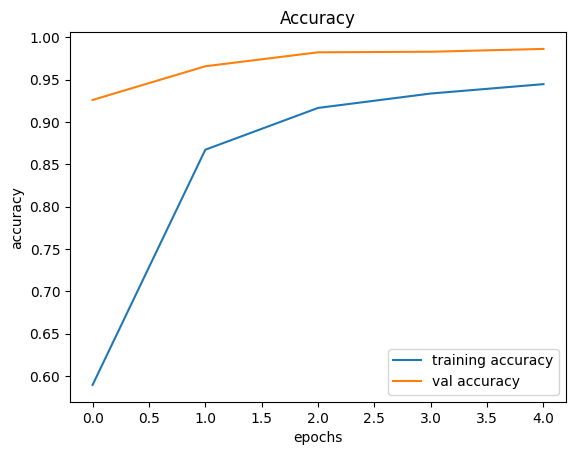

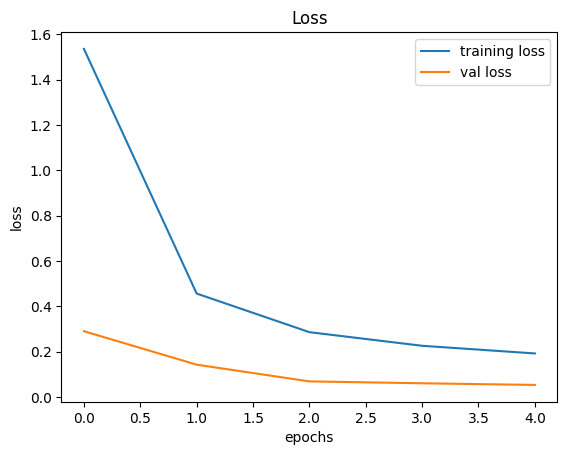

In [27]:
plt.figure(0)
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()




plt.figure(1)
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [ ]:
from sklearn.metrics import accuracy_score
y_test=pd.read_csv('/content/Test.csv')
label=y_test['ClassId'].values
imgs=y_test['Path'].values
data=[]


for img in imgs:
  image=Image.open(img)
  image=image.resize((30,30))
  data.append(np.array(image))
X_test=np.array(data)
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)
accuracy_score(labels,classes_x)